# Combine Datasets

In [31]:
import pandas as pd
import numpy as np

df3 = pd.read_csv("./datasets/merged03.txt")
df5 = pd.read_csv("./datasets/merged05.txt")
df6 = pd.read_csv("./datasets/merged06.txt")
df7 = pd.read_csv("./datasets/merged07.txt")
df8 = pd.read_csv("./datasets/merged08.txt")
df9 = pd.read_csv("./datasets/merged09.txt")
df10 = pd.read_csv("./datasets/merged10.txt")
df_all = pd.concat([df3,df5,df6,df7,df8,df9,df10]).reset_index(drop=True)
df_all

,time,mRegistered,mTimeStamp,mPci,mTac,mEarfcn,mMcc+mMnc,ss,rsrp,rsrq,activity,nextAP,handoverOccured,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrp,diff_in_rsrq
0,11-06 17:05:27.823,YES,963103842398,116,16185,2300,310260,19,-106,-10,UNKNOWN,116.0,0,15,-114,-15,4,8,5
1,11-06 17:05:29.918,YES,965204574639,116,16185,2300,310260,21,-102,-9,UNKNOWN,116.0,0,14,-113,-14,7,11,5
2,11-06 17:05:32.381,YES,967695762231,116,16185,2300,310260,22,-106,-12,UNKNOWN,116.0,0,14,-115,-18,8,9,6
3,11-06 17:05:34.873,YES,970146334089,116,16185,2300,310260,22,-103,-12,UNKNOWN,116.0,0,16,-111,-19,6,8,7
4,11-06 17:05:36.886,YES,972200049242,116,16185,2300,310260,20,-103,-10,UNKNOWN,116.0,0,15,-113,-18,5,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6556,11-22 15:53:07.812,YES,175929613562557,406,34624,850,310410,22,-100,-10,NOVALUE,406.0,0,24,-91,-12,-2,-9,2
6557,11-22 15:53:09.820,YES,175931744074331,406,34624,850,310410,21,-104,-12,NOVALUE,406.0,0,24,-91,-14,-3,-13,2
6558,11-22 15:53:09.832,YES,175931754969176,406,34624,850,310410,16,-111,-9,NOVALUE,406.0,0,24,-91,-14,-8,-20,5
6559,11-22 15:53:11.845,YES,175933765398127,406,34624,850,310410,17,-113,-13,NOVALUE,406.0,0,24,-91,-14,-7,-22,1


In [32]:
df_all['handoverOccured'].value_counts()

0    6315
1     246
Name: handoverOccured, dtype: int64

# Balance Dataset

In [33]:
pos_df_all = df_all[df_all['handoverOccured'] == 1]
neg_df_all = df_all[df_all['handoverOccured'] == 0]

In [34]:
SAMPLES_PER_CLASS = len(pos_df_all)
neg_samples = neg_df_all.sample(SAMPLES_PER_CLASS)
resampled_df = pd.concat([pos_df_all, neg_samples])
resampled_df

,time,mRegistered,mTimeStamp,mPci,mTac,mEarfcn,mMcc+mMnc,ss,rsrp,rsrq,activity,nextAP,handoverOccured,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrp,diff_in_rsrq
142,11-06 17:13:06.968,YES,1366721945471,116,16185,2300,310260,20,-110,-17,WALKING,99.0,1,12,-113,-14,8,3,-3
154,11-06 17:14:04.621,YES,1386078954743,99,16185,2300,310260,19,-113,-18,WALKING,44.0,1,15,-107,-14,4,-6,-4
261,11-06 17:21:06.485,YES,1553086144661,44,16185,675,310260,31,-81,-20,WALKING,434.0,1,31,-76,-9,0,-5,-11
296,11-06 17:22:58.934,YES,1623956480315,434,16185,2300,310260,31,-86,-19,UNKNOWN,328.0,1,31,-74,-8,0,-12,-11
320,11-06 17:24:03.438,YES,1676989424036,328,16185,2300,310260,27,-100,-19,UNKNOWN,370.0,1,31,-73,-14,-4,-27,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,11-07 20:05:32.037,YES,25915833905195,148,34624,850,310410,24,-97,-11,NOVALUE,148.0,0,25,-82,-8,-1,-15,-3
6114,11-22 14:59:46.083,YES,175233502688992,352,34635,850,310410,31,-79,-12,UNKNOWN,352.0,0,28,-85,-13,3,6,1
916,11-07 17:13:54.479,YES,23301343684272,79,16169,2300,310260,31,-80,-14,UNKNOWN,79.0,0,31,-83,-15,0,3,1
1053,11-07 17:25:25.686,YES,23472085119406,473,16169,675,310260,16,-107,-7,STILL,473.0,0,10,-114,-12,6,7,5


# Create Train and Test Data

# Train NN

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
def get_metrics_on_nn_with_features_removed(features_to_remove):
    features_of_interest = ["ss", "rsrq", "rsrp", "max_ss", "max_rsrp", "max_rsrq","diff_in_ss", "diff_in_rsrq", "diff_in_rsrp"]
    for feature in features_to_remove:
        features_of_interest.remove(feature)
    X = resampled_df[features_of_interest].values
    y = resampled_df['handoverOccured'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

    model = keras.Sequential(
        [
            layers.Dense(1000, activation="relu", name="layer1"),
            layers.Dense(1000, activation="relu", name="layer2"),
            layers.Dense(1000, activation="relu", name="layer3"),
            layers.Dense(1000, activation="relu", name="layer4"),
            layers.Dense(1, activation="sigmoid", name="layer5"),
        ]
    )
    # Call model on a test input
    y = model(X[0:2])

    model.compile(
        optimizer=keras.optimizers.RMSprop(
            learning_rate=0.000001
        ),  # Optimizer
        # Loss function to minimize
        loss="binary_crossentropy",
        metrics=["accuracy"] # tf.keras.metrics.Recall(), tf.keras.metrics.Precision()
    )

    def scheduler(epoch,lr):
        if epoch < 15: 
            return lr
        else: 
            return lr * tf.math.exp(-0.1)

    lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
    callbacks = [lr_callback]

    history = model.fit(
        X_train,
        y_train,
        batch_size=5,
        epochs=40,
        callbacks=callbacks,
        validation_data=(X_test, y_test)
    )
    best_loss = min(history.history['val_loss'])
    best_accuracy = max(history.history['val_accuracy'])
    return best_loss, best_accuracy
# Accuracy with all features
get_metrics_on_nn_with_features_removed([])

Epoch 1/40
66/66 [==============================] - 2s 27ms/step - loss: 57846.9375 - accuracy: 0.5167 - val_loss: 0.7604 - val_accuracy: 0.6012 - lr: 1.0000e-06
Epoch 2/40
66/66 [==============================] - 2s 24ms/step - loss: 0.9686 - accuracy: 0.5593 - val_loss: 0.6980 - val_accuracy: 0.6442 - lr: 1.0000e-06
Epoch 3/40
66/66 [==============================] - 1s 22ms/step - loss: 0.7670 - accuracy: 0.5775 - val_loss: 0.6412 - val_accuracy: 0.6626 - lr: 1.0000e-06
Epoch 4/40
66/66 [==============================] - 2s 23ms/step - loss: 0.6523 - accuracy: 0.6049 - val_loss: 0.6304 - val_accuracy: 0.6810 - lr: 1.0000e-06
Epoch 5/40
66/66 [==============================] - 2s 24ms/step - loss: 0.6425 - accuracy: 0.6444 - val_loss: 0.6207 - val_accuracy: 0.7178 - lr: 1.0000e-06
Epoch 6/40
66/66 [==============================] - 1s 23ms/step - loss: 0.6392 - accuracy: 0.6596 - val_loss: 0.6157 - val_accuracy: 0.7239 - lr: 1.0000e-06
Epoch 7/40
66/66 [==============================

(0.5362632870674133, 0.8098159432411194)

In [36]:
performance_dict = {}
performance_dict["base"] = get_metrics_on_nn_with_features_removed([])
for feature in features_of_interest:
    performance_dict[f'no_{feature}'] = get_metrics_on_nn_with_features_removed([feature])

Epoch 1/40
66/66 [==============================] - 2s 25ms/step - loss: 0.9463 - accuracy: 0.5350 - val_loss: 0.8167 - val_accuracy: 0.3804 - lr: 1.0000e-06
Epoch 2/40
66/66 [==============================] - 2s 26ms/step - loss: 0.8060 - accuracy: 0.5258 - val_loss: 0.7472 - val_accuracy: 0.4049 - lr: 1.0000e-06
Epoch 3/40
66/66 [==============================] - 2s 24ms/step - loss: 0.7255 - accuracy: 0.5775 - val_loss: 0.6874 - val_accuracy: 0.5460 - lr: 1.0000e-06
Epoch 4/40
66/66 [==============================] - 2s 23ms/step - loss: 0.6632 - accuracy: 0.5897 - val_loss: 0.6701 - val_accuracy: 0.6687 - lr: 1.0000e-06
Epoch 5/40
66/66 [==============================] - 2s 25ms/step - loss: 0.6583 - accuracy: 0.6505 - val_loss: 0.6519 - val_accuracy: 0.7669 - lr: 1.0000e-06
Epoch 6/40
66/66 [==============================] - 1s 21ms/step - loss: 0.6479 - accuracy: 0.6839 - val_loss: 0.6311 - val_accuracy: 0.7791 - lr: 1.0000e-06
Epoch 7/40
66/66 [==============================] - 

Text(0.5, 1.0, 'Change In Loss From Removing Feature')

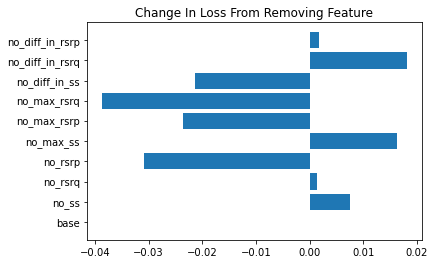

In [53]:
import matplotlib.pyplot as plt
base = performance_dict['base'][0]
plt.barh(list(performance_dict.keys()),[val[0] - base for key,val in performance_dict.items()])
plt.title("Change In Loss From Removing Feature")

Text(0.5, 1.0, 'Change In Accuracy From Removing Feature')

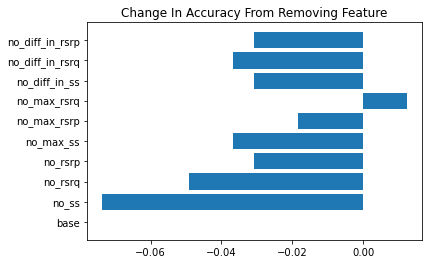

In [54]:
import matplotlib.pyplot as plt
base = performance_dict['base'][1]
plt.barh(list(performance_dict.keys()),[val[1] - base for key,val in performance_dict.items()])
plt.title("Change In Accuracy From Removing Feature")

In [38]:
performance_dict

{'base': (0.5413393378257751, 0.8282208442687988),
 'no_ss': (0.5488295555114746, 0.754601240158081),
 'no_rsrq': (0.5426155924797058, 0.7791411280632019),
 'no_rsrp': (0.5105069279670715, 0.7975460290908813),
 'no_max_ss': (0.5576506853103638, 0.7914110422134399),
 'no_max_rsrp': (0.5177268981933594, 0.8098159432411194),
 'no_max_rsrq': (0.5026883482933044, 0.8404908180236816),
 'no_diff_in_ss': (0.5199053287506104, 0.7975460290908813),
 'no_diff_in_rsrq': (0.5594078898429871, 0.7914110422134399),
 'no_diff_in_rsrp': (0.5430774092674255, 0.7975460290908813)}

In [55]:
# Try Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
clf = LogisticRegression(random_state=0).fit(scaler.transform(X_train), y_train)
y_train_pred = clf.predict(scaler.transform(X_train))
y_test_pred = clf.predict(scaler.transform(X_test))
train_acc = np.mean(y_train == y_train_pred)
test_acc = np.mean(y_test_pred == y_test)
train_acc, test_acc

(0.5, 0.5531914893617021)

In [58]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

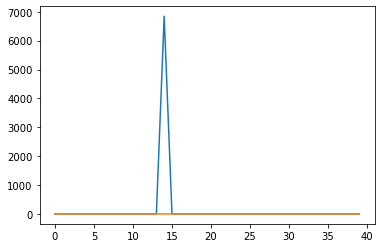

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

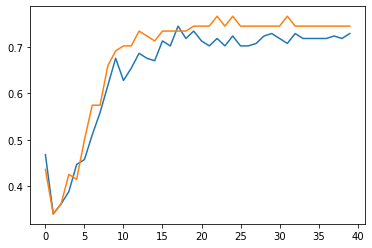

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Create Dataset over multiple timesteps

In [ ]:
# N x T x F
df_all[features_of_interest]

,ss,rsrq,rsrp,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrq,diff_in_rsrp
0,19,-10,-106,15,-114,-15,4,5,8
1,21,-9,-102,14,-113,-14,7,5,11
2,22,-12,-106,14,-115,-18,8,6,9
3,22,-12,-103,16,-111,-19,6,7,8
4,20,-10,-103,15,-113,-18,5,8,10
...,...,...,...,...,...,...,...,...,...
3317,11,-17,-123,7,-126,-18,4,1,3
3318,10,-18,-125,6,-130,-18,4,0,5
3319,10,-20,-127,6,-128,-17,4,-3,1
3320,9,-20,-130,0,-1000,-1000,9,980,870
